In [527]:
import numpy as np
from matplotlib import pyplot as plt
from tools import cdffit, pdffit

In [504]:
x = np.random.normal(size=2000)

(array([  2.,  30., 108., 334., 533., 503., 313., 141.,  30.,   6.]),
 array([-3.51322234, -2.81870733, -2.12419231, -1.42967729, -0.73516227,
        -0.04064726,  0.65386776,  1.34838278,  2.04289779,  2.73741281,
         3.43192783]),
 <BarContainer object of 10 artists>)

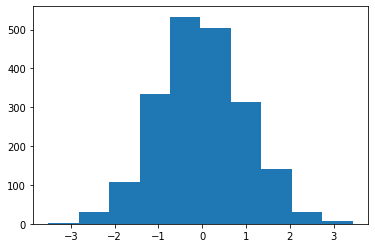

In [505]:
plt.hist(x)

In [506]:
x.sort()
y = np.linspace(0, 1, len(x))

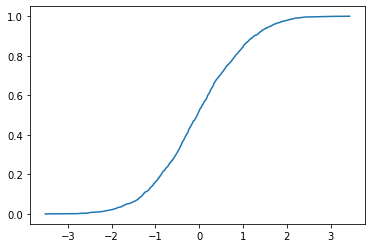

In [507]:
plt.plot(x, y)

In [508]:
ref = (x-x.min())/(x.max()-x.min())

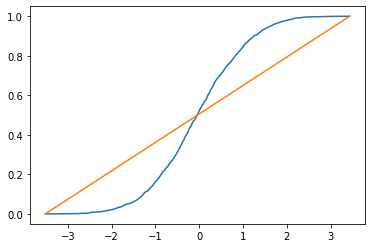

In [509]:
plt.plot(x, y)
plt.plot(x, ref)

In [510]:
res = y - ref

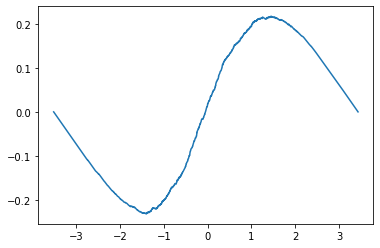

In [511]:
plt.plot(x, res)

### DATA

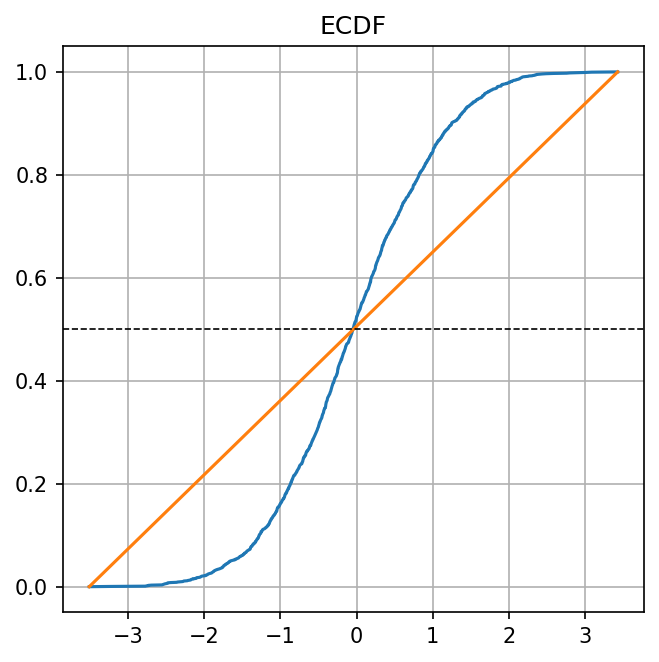

In [512]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x, y)
ax.plot(x, ref)
ax.grid()
ax.set_title('ECDF')
ax.axhline(0.5, linestyle='--', color='k', linewidth=.8)

Text(0.5, 1.0, 'Peak ECDF')

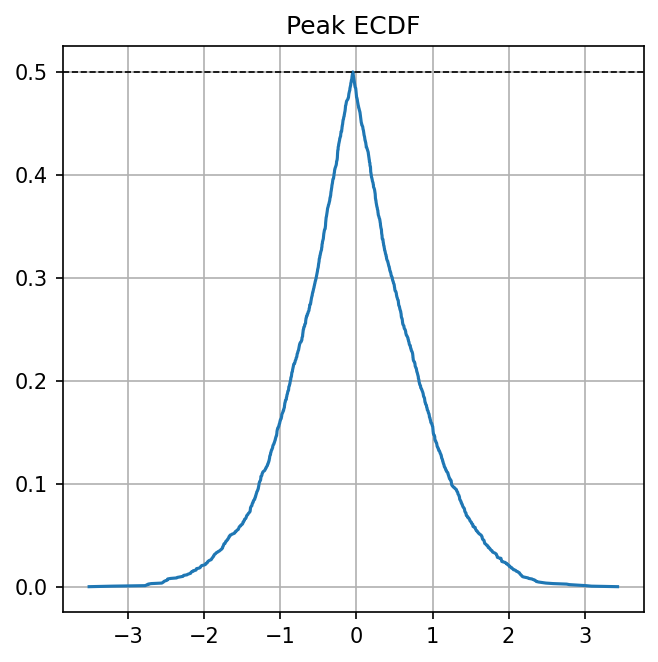

In [513]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
pcdf = y.copy()
pcdf[y>0.5] = 1 - pcdf[y>0.5]

ax.plot(x, pcdf)
ax.grid()
ax.axhline(0.5, linestyle='--', color='k', linewidth=.8)
ax.set_title('Peak ECDF')

Text(0.5, 1.0, 'residuals')

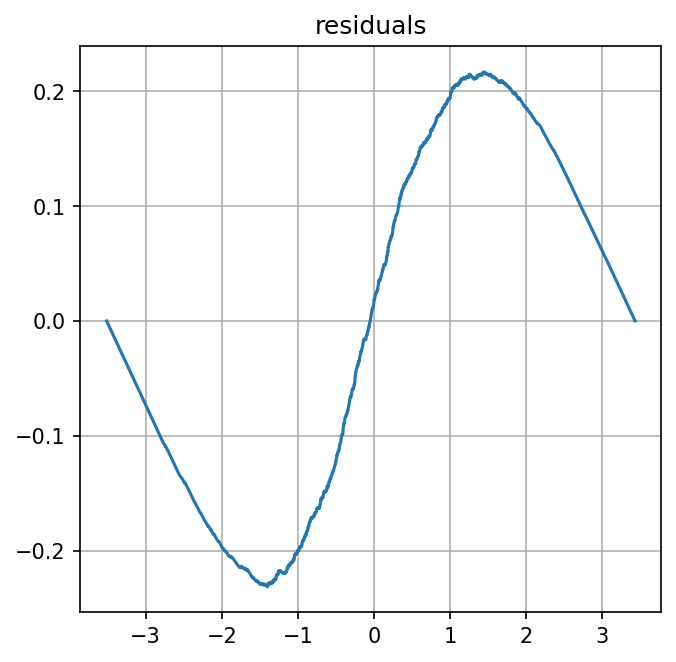

In [514]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x, res)
ax.grid()
ax.set_title('residuals')

In [515]:
n = 3  # number of frequencies

cols = []
f = np.pi / (max(x)-min(x))
for i in range(1, n+1):
    cols.append(np.sin(f*i*(x-min(x))))
M = np.column_stack(cols)
A = M.transpose()
pars = np.linalg.solve(A@M, A@res)

### Function basis

Text(0.5, 1.0, 'basis functions')

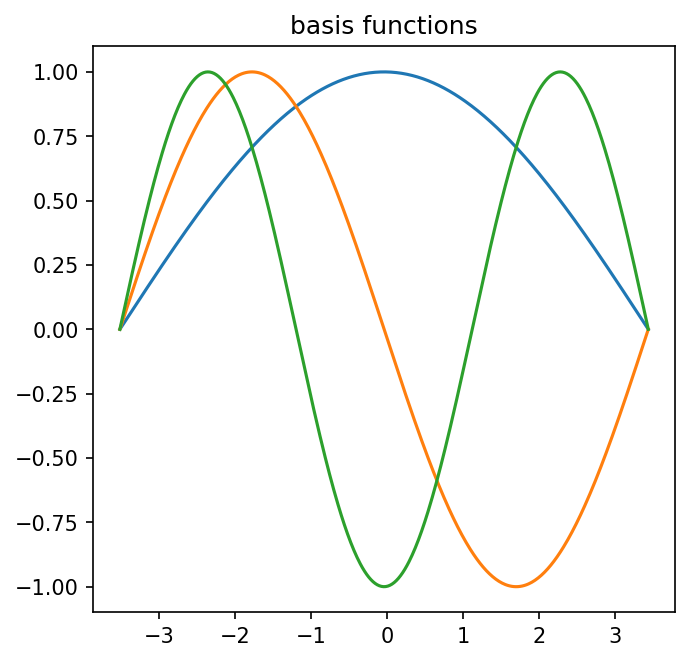

In [516]:
t = np.linspace(min(x), max(x), 500)
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
f = np.pi / (max(x)-min(x))
for i in range(1, n+1):
    ax.plot(t, np.sin(f*i*(t-x.min())))
ax.set_title('basis functions')

### FIT

Text(0.5, 1.0, 'Fourier fit')

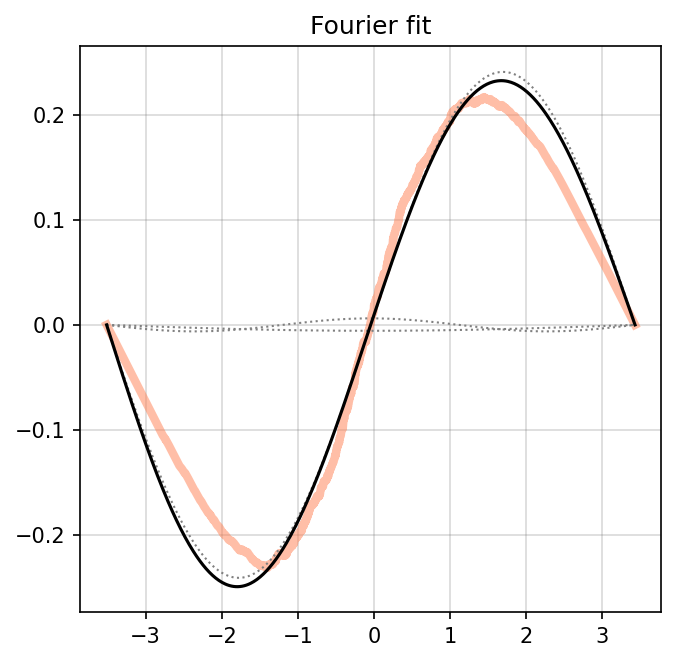

In [517]:
t = np.linspace(min(x), max(x), 500)

fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x, res, linewidth=4, alpha=0.5, color='coral')

model = np.repeat(0, len(t))
for i, a in enumerate(pars):
    #mi = a*np.sin(f*(i+1)*(x-min(x)))
    mit = a*np.sin(f*(i+1)*(t-min(t)))
    ax.plot(t, mit, color='grey', linewidth=1, linestyle=':')
    model = model + mit

ax.plot(t, model, color='k', label='fit')
ax.grid(linewidth='0.2', color='dimgrey')
ax.set_title('Fourier fit')

Text(0.5, 1.0, 'Fourier fit')

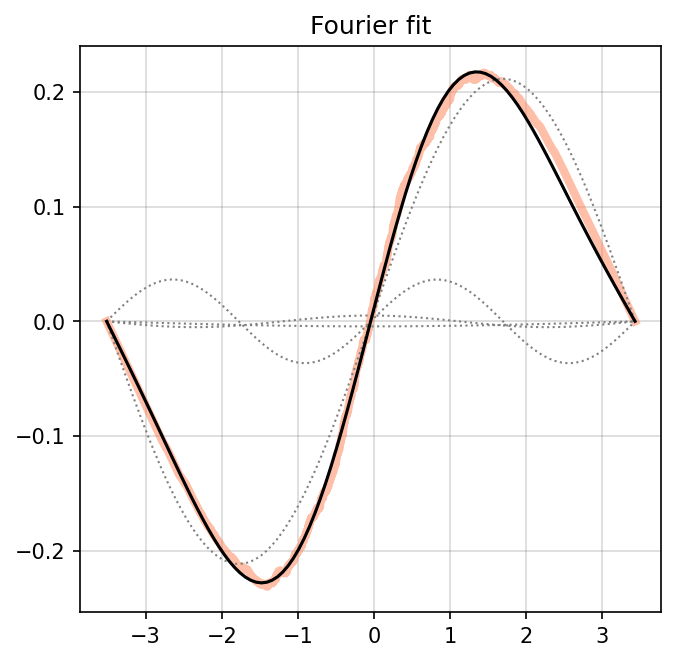

In [519]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()

ax.plot(x, res, linewidth=4, alpha=0.5, color='coral')
model = cdffit(x, 4, 100)
t = np.linspace(min(x), max(x), 100)
ax.plot(t, model, color='k', label='fit')
ax.grid(linewidth='0.2', color='dimgrey')
ax.set_title('Fourier fit')

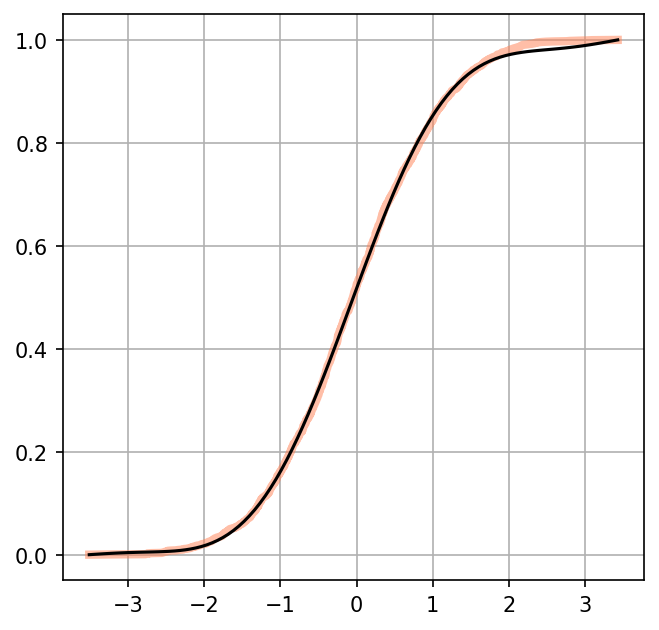

In [520]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x, y, linewidth=4, alpha=0.5, color='coral')
md = model + (t-min(x))/(max(x)-min(x))
ax.plot(t, md, color='k', label='fit')
ax.grid()

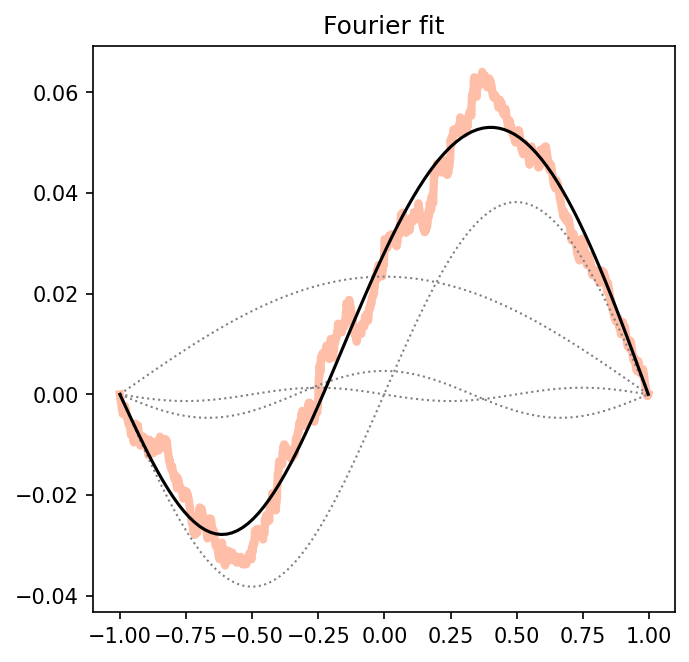

In [521]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()

xx = x[np.logical_and(x>-1, x<1)]
yy = np.linspace(0, 1, len(xx))

rref = (xx-min(xx))/(max(xx)-min(xx))
rres = yy - rref

ax.plot(xx, rres, linewidth=4, alpha=0.5, color='coral')
model = cdffit(xx, 4, 100)
t = np.linspace(min(xx), max(xx), 100)
ax.plot(t, model, color='k', label='fit')
ax.grid(linewidth='0.2', color='dimgrey')
ax.set_title('Fourier fit')
ax.grid()

### Model for PDF

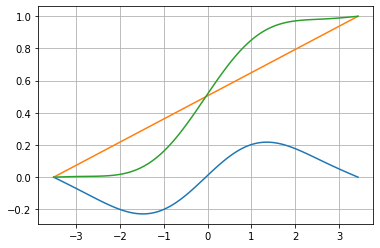

In [522]:
Nt = 100
t = np.linspace(min(x), max(x), Nt)
model_res = cdffit(x, 4, Nt)
model_cdf = model_res + (t-min(x))/(max(x)-min(x))

plt.plot(t, model_res)
plt.plot(t, (t-min(x))/(max(x)-min(x)))
plt.plot(t, model_cdf)
plt.grid()

In [523]:
xm = x[np.argmin(abs(model_cdf-0.5))]
xm

-1.9519585549733625

In [524]:
m1 = model_cdf[t>xm]
mm = m1[1:]-m1[:-1]
mm = mm - mm[-1]
mm = np.maximum(mm, 0)
mm1 = mm / mm[0]
tt1 = np.linspace(xm, max(x), len(mm1))

m1 = model_cdf[t<=xm]
mm = m1[1:]-m1[:-1]
mm = mm - mm[0]
mm = np.maximum(mm, 0)
mm2 = mm / mm[-1]
tt2 = np.linspace(min(x), xm, len(mm2))

mmt = np.concatenate([mm1, mm2])
ttt = np.concatenate([tt1, tt2])

In [525]:
A = sum(mmt) * (tt1[1]-tt1[0])
mmt = mmt / A

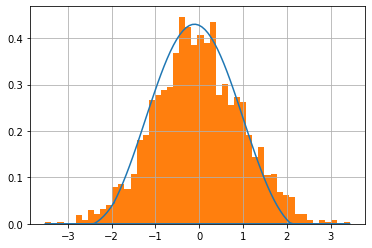

In [531]:
plt.plot(ttt, mmt)
plt.grid()
H = plt.hist(x, density=True, bins=50)

In [591]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [592]:
from tools import cdffit, pdffit, pdffit_num

In [593]:
fx, fy = pdffit_num(x, 3, 100)

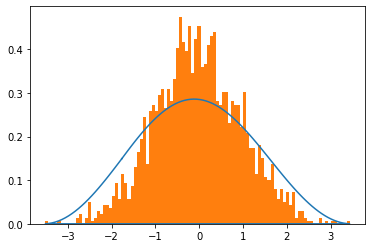

In [594]:
plt.plot(fx, fy)
H = plt.hist(x, density=True, bins=100)

## Ahora probemos con la derivada

In [595]:
n = 7

x.sort()
y = np.linspace(0, 1, len(x))
ref = (x-x.min())/(x.max()-x.min())
res = y - ref
cols = []
f = np.pi / (max(x)-min(x))
for i in range(1, n+1):
    cols.append(np.sin(f*i*(x-min(x))))
M = np.column_stack(cols)
A = M.transpose()
pars = np.linalg.solve(A@M, A@res)

ns = 100
t = np.linspace(min(x), max(x), ns)
modelpdf = np.repeat(1/(max(x)-min(x)), ns)
for i, a in enumerate(pars):
    mit = a*np.cos(f*(i+1)*(t-min(t)))*f*(i+1)
    modelpdf = modelpdf + mit

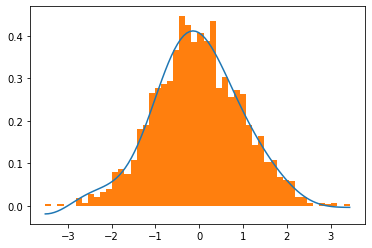

In [596]:
plt.plot(t, modelpdf)
h = plt.hist(x, density=True, bins=50)

In [597]:
fx, fy = pdffit(x, 4, 100)

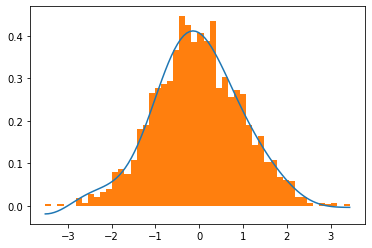

In [599]:
plt.plot(fx, fy)
h = plt.hist(x, density=True, bins=50)